In [1]:
import os
import numpy as np
import pandas as pd
import spikeextractors as se
import spiketoolkit as st
import spikewidgets as sw

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from utils import *

```
np.array(get_trange('2021-02-11_07-00-18_OR179_3_136_U223_morning', 'Or179_44238.36510326_2_11_10_8_30.wav',offset=datetime.timedelta(minutes=6)))
```

Data retrieval and organization

In [2]:
os.path.normpath('\Record Node 101\experiment1\recording1\continuous\Rhythm_FPGA-100.0\continuous.dat')

'\\Record Node 101\\experiment1\recording1\\continuous\\Rhythm_FPGA-100.0\\continuous.dat'

In [3]:
paths = [os.path.join('..\\..\\data',folder) for folder in os.listdir(r'../../data') if '2021' in folder]

In [4]:
paths

['..\\..\\data\\2021-02-11_07-00-18_Or179_morning',
 '..\\..\\data\\2021-02-12_22-13-24_Or179_Or177_overnight',
 '..\\..\\data\\2021-02-15_21-59-19_Or179_Or177_overnight',
 '..\\..\\data\\2021-02-16_12-11-35_Or179_Or177_afternoon',
 '..\\..\\data\\2021-02-21_12-04-54_Or179_Or177_afternoon',
 '..\\..\\data\\2021-02-22_22-00-20_Or179_or177_overnight',
 '..\\..\\data\\2021-02-27_21-58-36_Or179_Or177_overnight',
 '..\\..\\data\\2021-03-06_22-00-33_Or179_Or177_overnight']

In [5]:
recordings = []
for data_path in paths:
    
    # Find path to data on hard drive
    with open(os.path.normpath(os.path.join(data_path, 'LFP_location.txt'))) as f:    
        OE_data_path = f.read()
    
    # FIgure out channel numebr
    nchan = 40 if "or177" in data_path.lower() else 24
    
    # For a form '..\\..\\data\\2021-02-11_07-00-18_Or179_morning'
    date = data_path.split('\\')[-1].split('_')[0]
    
    # Put recording in container
    recordings.append(
        (se.BinDatRecordingExtractor(
            OE_data_path,
            30000,
            nchan,
            dtype='int16',
        ), date)
     )

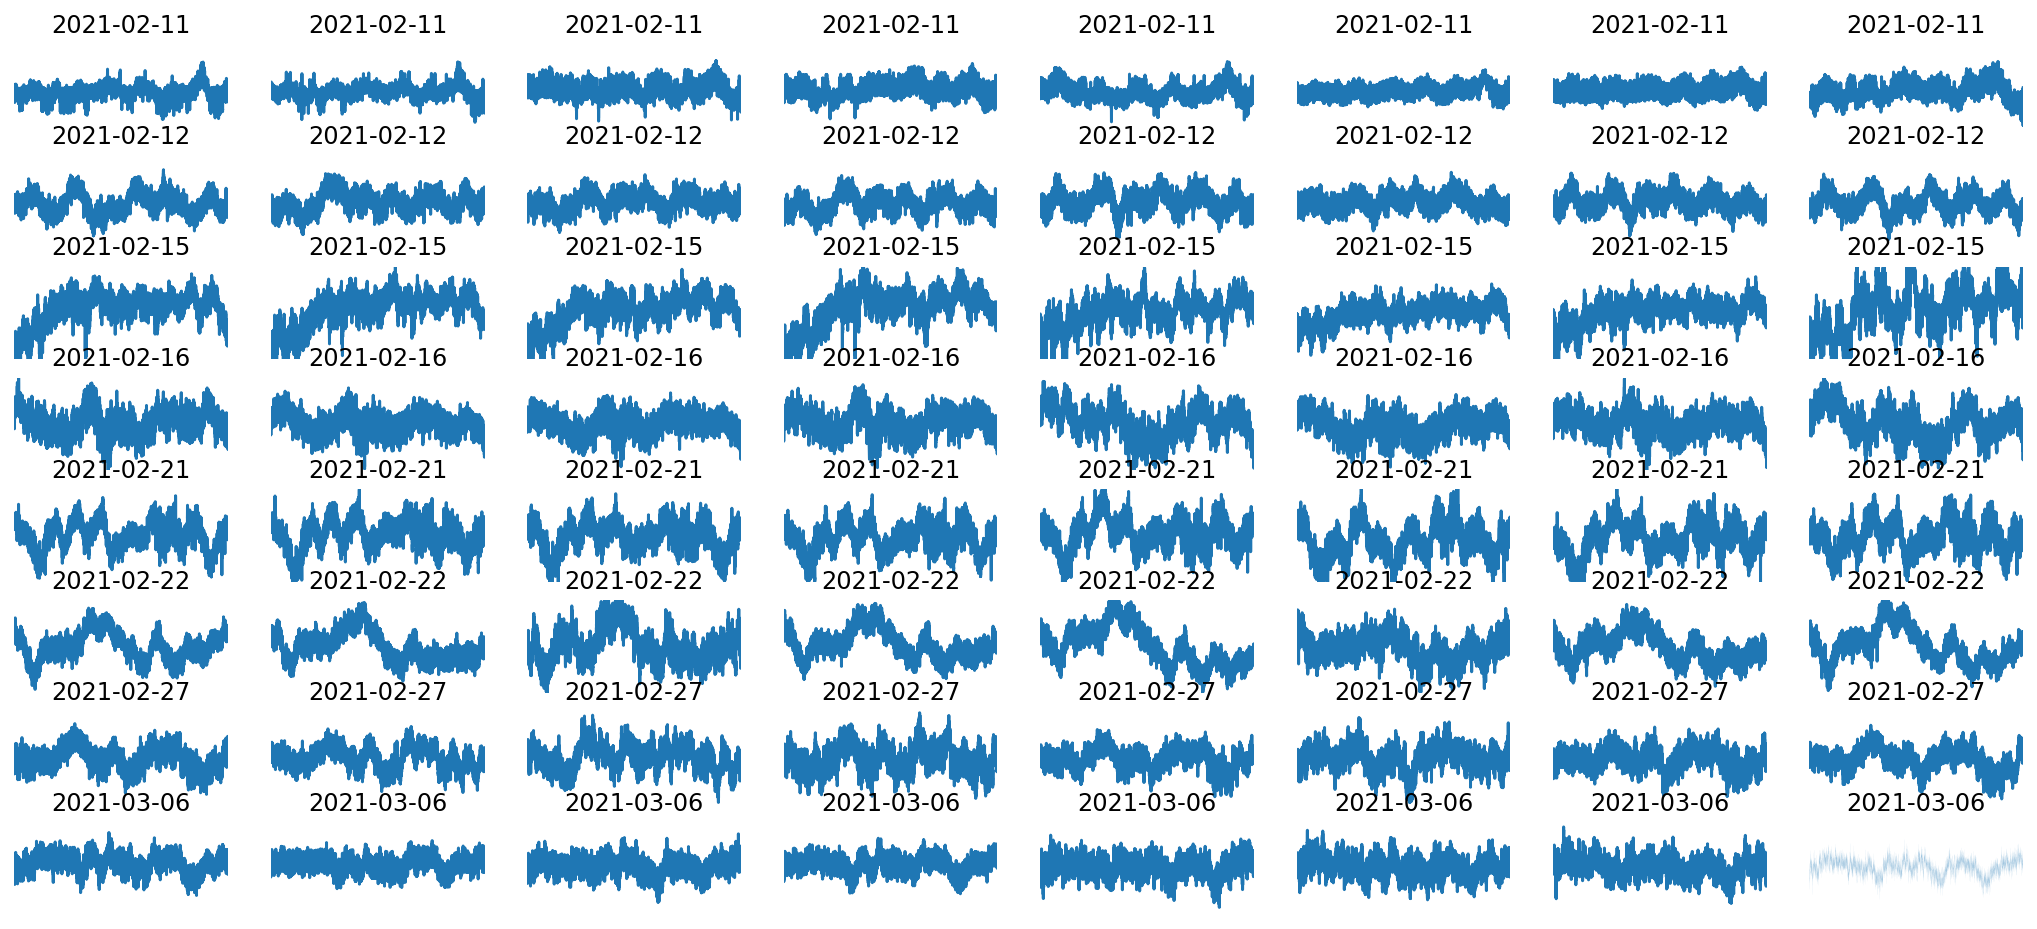

In [6]:
fig, axes = plt.subplots(len(recordings), 8, figsize=[18,8],sharey=True)
for i, (recording, date) in enumerate(recordings):
    for j in range(8):
        ax = axes[i,j]
        sw.plot_timeseries(recording, channel_ids=[j], ax=ax, trange=[450,451])
        ax.set_title(date)
        ax.axis('off')
        # Clean lines
        for line in plt.gca().lines:
            line.set_linewidth(0.01) 
        
        

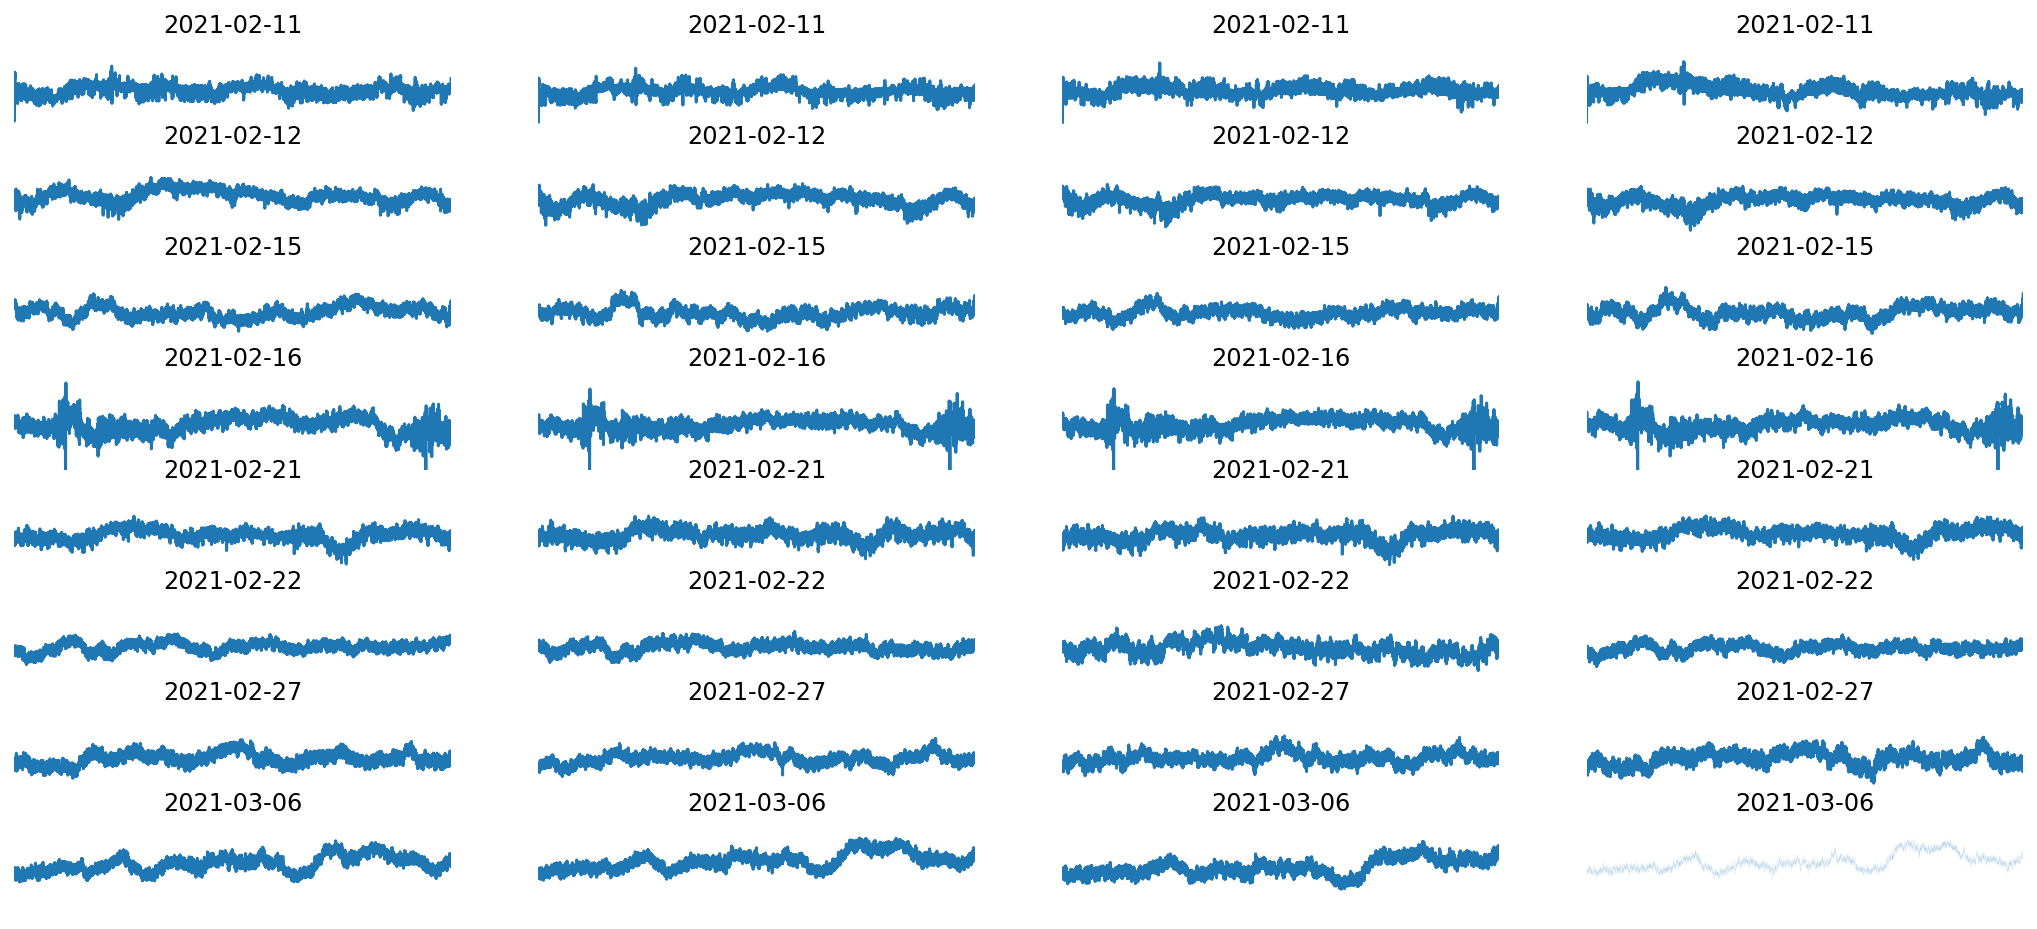

In [7]:
fig, axes = plt.subplots(len(recordings), 4, figsize=[18,8],sharey=True)
for i, (recording, date) in enumerate(recordings):
    for j in range(4):
        ax = axes[i,j]
        sw.plot_timeseries(recording, channel_ids=[j], ax=ax, trange=[458,459])
        ax.set_title(date)
        ax.axis('off')
        # Clean lines
        for line in plt.gca().lines:
            line.set_linewidth(0.01) 

In [91]:
chanmap=np.array([[3, 7, 11, 15],[2, 4, 10, 14],[4, 8, 12, 16],[1, 5, 9, 13]])